<a href="https://colab.research.google.com/github/insightcs24/digitaldiary/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('TCS.NS')
df=data
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,289.952148,292.748866,288.949173,291.167260,1963682
1,2010-01-05,290.029175,292.999486,287.984683,291.244309,2014488
2,2010-01-06,283.471436,290.164284,282.757800,290.029256,3349176
3,2010-01-07,275.582825,285.226680,274.271251,283.722229,6474892
4,2010-01-08,269.950714,277.164320,268.677730,276.199935,6048178


In [6]:
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-6-e54f1e21f52c>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,289.952148,292.748866,288.949173,291.167260,1963682
1,290.029175,292.999486,287.984683,291.244309,2014488
2,283.471436,290.164284,282.757800,290.029256,3349176
3,275.582825,285.226680,274.271251,283.722229,6474892
4,269.950714,277.164320,268.677730,276.199935,6048178


Visualizing Closing Price

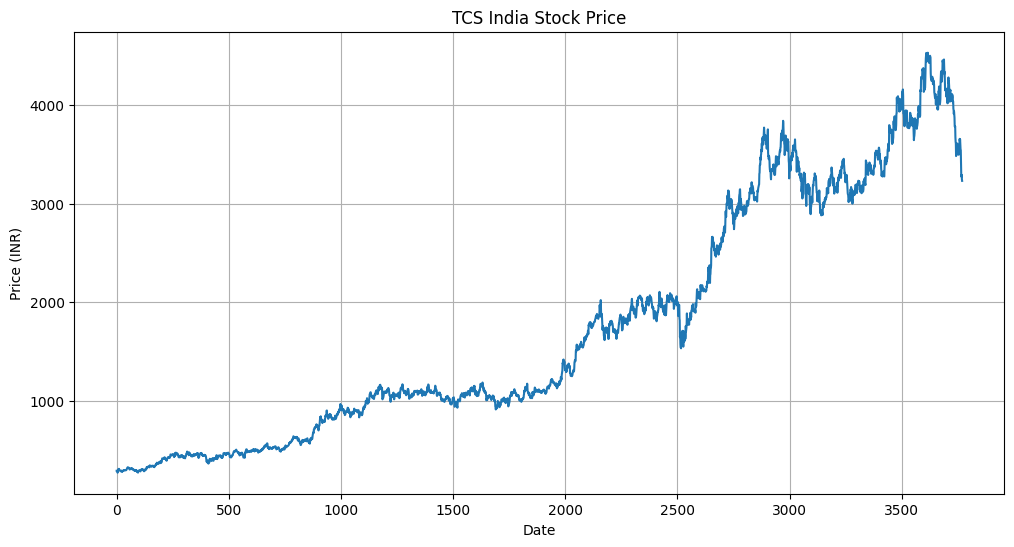

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [8]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,289.952148,292.748866,288.949173,291.167260,1963682
1,290.029175,292.999486,287.984683,291.244309,2014488
2,283.471436,290.164284,282.757800,290.029256,3349176
3,275.582825,285.226680,274.271251,283.722229,6474892
4,269.950714,277.164320,268.677730,276.199935,6048178
...,...,...,...,...,...
3765,3299.399902,3399.649902,3295.500000,3362.600098,5317367
3766,3274.050049,3291.399902,3056.050049,3100.000000,6623955
3767,3292.949951,3349.000000,3255.300049,3302.050049,5557558


# Plotting moving averages of 100 day

---



In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3765,3990.330791
3766,3981.184109
3767,3972.239399
3768,3963.300571


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

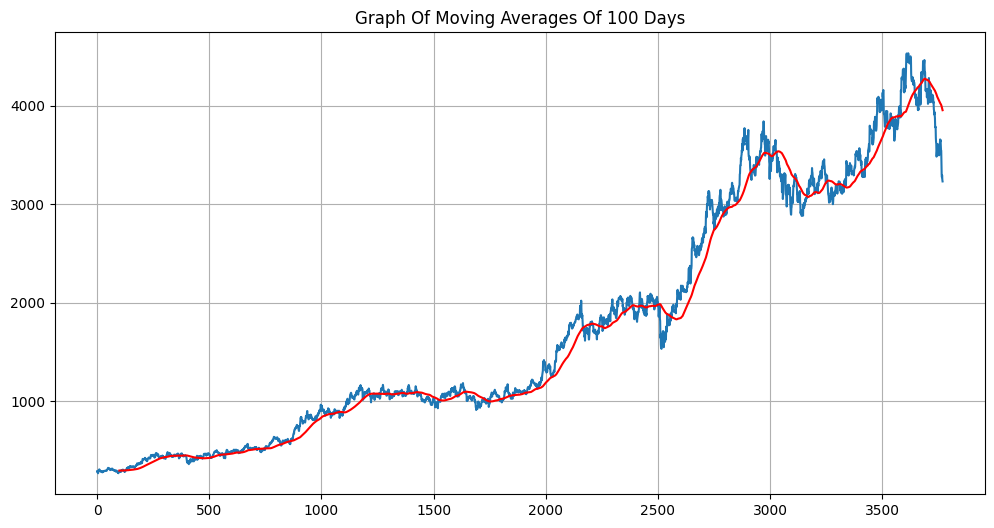

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3765,4095.654933
3766,4093.151858
3767,4090.815020
3768,4088.129767


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

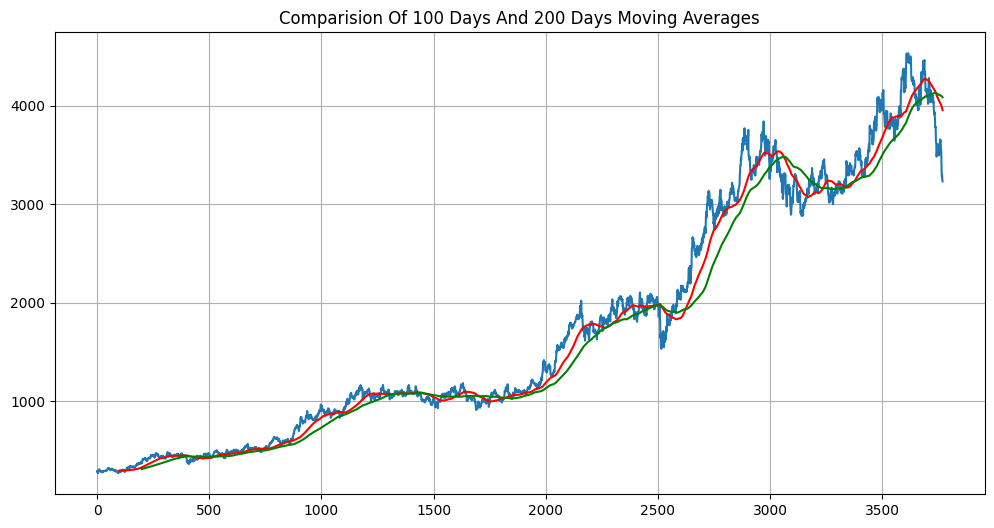

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [13]:
df.shape

(3770, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [14]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2639, 6)
(1131, 6)


In [15]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,289.952148,292.748866,288.949173,291.167260,1963682
1,2010-01-05,290.029175,292.999486,287.984683,291.244309,2014488
2,2010-01-06,283.471436,290.164284,282.757800,290.029256,3349176
3,2010-01-07,275.582825,285.226680,274.271251,283.722229,6474892
4,2010-01-08,269.950714,277.164320,268.677730,276.199935,6048178


In [16]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2639,2020-09-16,2356.119629,2360.449785,2331.927795,2342.894061,3074003
2640,2020-09-17,2316.537598,2349.295526,2306.795090,2334.469760,4828176
2641,2020-09-18,2306.135498,2353.672070,2293.427702,2339.175861,4183256
2642,2020-09-21,2320.631836,2357.907899,2308.253364,2320.349395,4598809
2643,2020-09-22,2374.899170,2405.068470,2313.760587,2339.176183,7499613


# Using MinMax scaler for normalization of the dataset

---



In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [19]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.00945028],
       [0.00948743],
       [0.00890148],
       ...,
       [0.92716417],
       [0.95129155],
       [1.        ]])

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(2539, 100, 1)

# ML Model (LSTM)

---



In [22]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [25]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - loss: 0.0724 - mean_absolute_error: 0.1933
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0067 - mean_absolute_error: 0.0558
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0054 - mean_absolute_error: 0.0509
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0049 - mean_absolute_error: 0.0478
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0059 - mean_absolute_error: 0.0531
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0040 - mean_absolute_error: 0.0445
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0045 - mean_absolute_error: 0.0450
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0041 - mean_absolute_error: 0.0440
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0041 - mean_absolute_error: 0.0433
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0036 - mean_absolute_error: 0.0408
Epoch 11/100
80/80 ━━━━━━━━

In [26]:
model.save('keras_model.h5')

In [27]:
test_close.shape

(1131, 1)

In [28]:
past_100_days = pd.DataFrame(train_close[-100:])

In [29]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [35]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,2000.000000
1,2016.800049
2,1982.599976
3,1989.750000
4,1994.300049


In [36]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.01078957],
       [0.01375915],
       ...,
       [0.55887943],
       [0.54425716],
       [0.55447513]])

In [37]:
input_data.shape

(1231, 1)

# Testing the model

---



In [38]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1131, 100, 1)
(1131,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [40]:
# Making predictions

y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step


In [41]:
y_pred.shape

(1131, 1)

In [42]:
y_test

array([0.2209268 , 0.21795855, 0.21961672, ..., 0.55887943, 0.54425716,
       0.55447513])

In [43]:
y_pred

array([[0.20692252],
       [0.20918301],
       [0.21181625],
       ...,
       [0.6095551 ],
       [0.59027064],
       [0.5704088 ]], dtype=float32)

In [44]:
scaler.scale_

array([0.00035234])

In [45]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

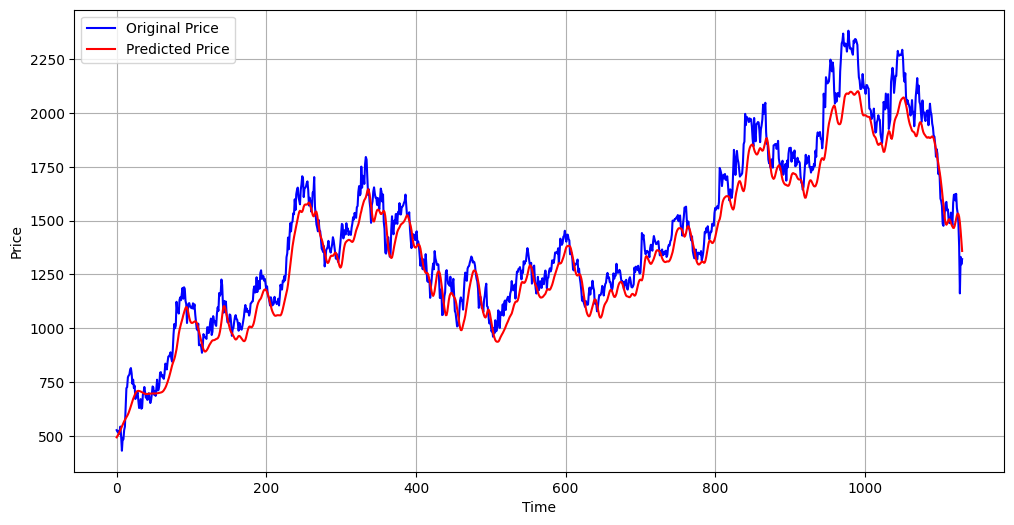

In [46]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [47]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 5.91%


Calculation of R2 score

In [48]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9279980936860097


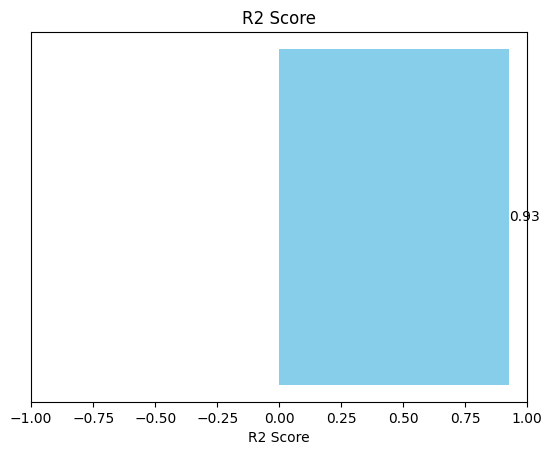

In [49]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

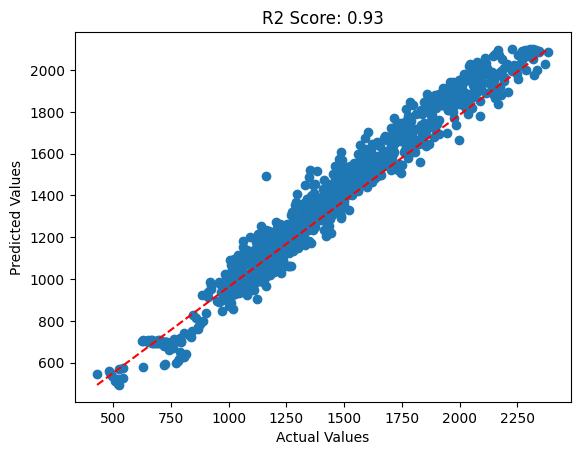

In [50]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()